# Описание проекта  
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».  


# Шаг 1. Откройте файл с данными и изучите общую информацию

Для начала прочитаем файл и сохраним  в переменную. выведем на экран первые 10 строк таблицы. Первый взгляд на сырые данные - это важная часть любого исследования.

In [238]:
import pandas as pd
import matplotlib.pyplot as plt 
from scipy import stats as st
import numpy as np
import seaborn as sns

data = pd.read_csv('/datasets/games.csv') 
display(data.head(10))
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Как видно из сводной информации по таблице - в данных есть пропуски  и в некоторых колонках необходимо будет провести замену типа данных.
Займемся подготовкой данных для последующего исследования.

# Шаг 2. Подготовьте данные

- Замените названия столбцов (приведите к нижнему регистру);  
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;  
- Обработайте пропуски при необходимости:  
   - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;  
   - Опишите причины, которые могли привести к пропускам;  
- Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;  
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.  

Для начала приведем названия столбцов к нижнему регистру. 

In [239]:
data.columns = data.columns.str.lower()

data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Преобразуем данные в нужные типы и обработаем пропуски, так как данные были взяты из открытых источников, они могут содержать много пропусков , в предыдущем пункте можно было заметить, что достаточно много данных отсутствует в колонках с рейтингом и с оценками пользователей и критиков.

In [240]:
print('Количество пропусков', data['year_of_release'].isna().sum()) #посчитаем количество пропусков

data.dropna(subset = ['year_of_release'], inplace=True) # т.к пропусков не так много, удалим строки с пропущ.значениями

data['year_of_release'] = data['year_of_release'].apply(int) # изменим тип даннных


Количество пропусков 269


In [241]:
data['year_of_release'].isna().sum()# сделаем проверку на пропуски

0

In [242]:
data.dropna(subset = ['name'], inplace=True)# в колонке было только 2 пропуска, поэтому можем от них избавиться
data['name'].isna().sum()

0

Далее будем работать с колонкой user_score, здесь достаточно часто встречается  аббревиатура 'tbd' или  "to be defined " поэтому и тип данных определяется как object. Заменим тип данных на числовой

In [243]:
data.loc[data['user_score']== 'tbd', 'user_score'] = float('nan')# с помощью логической индексации найдем все строки, удовлетворяющие нашему условию и заменим 'tbd' на 'nan'
data['user_score'] = data['user_score'].astype(float) #теперь можно изменить тип данных


In [244]:
data.info() #выведем сводную информацию после изменений


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Теперь посчитаем суммарные продажи и запишем их в отдельный столбец.

In [245]:
#создаем отдельный столбец с выручкой
data['total_sales'] = data[['na_sales','eu_sales', 'jp_sales', 'other_sales' ]].sum(axis=1)

data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


На этом этапе мы подготовили данные к дальнейшему исследованию, привели названия столбцов к нижнему регистру, заменили типы данных в колонках  year_of_release, user_score, добавили новый столбец в таблицу. 

# Шаг 3. Проведите исследовательский анализ данных

**Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

In [246]:
#посмотрим на количество игр за каждый год применяя метод value_counts()
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

Данные за все периоды нам не нужны, т.к мы делаем прогноз на 2017 год, то соответственно следующим шагом будем определять период для иследования.

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [247]:
 #сделаем группировку по платформам и суммарными продажам
total_sales = data.groupby('platform')['total_sales'].agg(['sum']).reset_index().sort_values('sum', ascending=False)
display(total_sales)

top_sales = total_sales.query("sum > 100") # сделаем срез с суммарными продажами больше 100 млн. 
#display(top_sales)
top_sales_platforms = top_sales['platform'] # запишем series в переменную
display(top_sales_platforms)


,platform,sum
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


16     PS2
28    X360
17     PS3
26     Wii
4       DS
15      PS
18     PS4
6      GBA
19     PSP
2      3DS
13      PC
5       GB
29      XB
11     NES
10     N64
23    SNES
7       GC
30    XOne
Name: platform, dtype: object

Text(0.5, 1.0, 'Platform_sales')

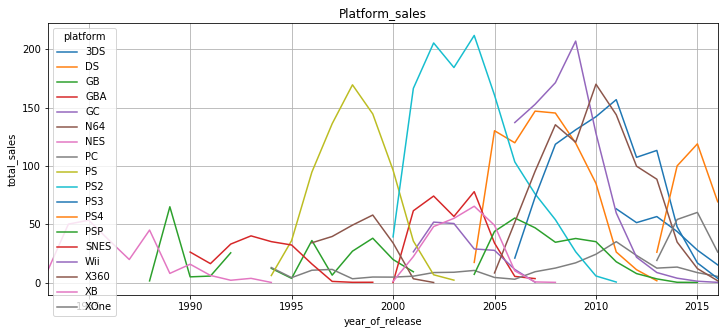

In [248]:
#выше мы определили платформы с суммарными продажами больше 100 млн. теперь построим распределение по годам 
platform_sales = data.query('platform in @top_sales_platforms'
).pivot_table(index = 'year_of_release',  columns = 'platform', values = 'total_sales', aggfunc ='sum')
#display(platform_sales) #сделаем сводную таблицу и построим график 

platform_sales.plot(grid =True,figsize = (12,5));


plt.xlabel('year_of_release')
plt.ylabel('total_sales')
plt.title('Platform_sales')


Теперь определим в течении какого срока появляются новые и исчезают старые платформы.

In [249]:
platform_lifetime = data.query('platform in @top_sales_platforms'
).pivot_table (index = ['platform', 'year_of_release'], values = 'total_sales', aggfunc = 'sum')
#display(platform_lifetime)
platform_lifetime = platform_lifetime.pivot_table (index = 'platform', values = 'total_sales', aggfunc = 'count')
platform_lifetime.columns = ['years']
print ('Средний срок существования платформы:', platform_lifetime.mean())

Средний срок существования платформы: years    10.277778
dtype: float64


**Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы**

**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ**

Исходя из нашего анализа - актуальным периодом будет 2013-2016 г включительно, по нему будем проводить дальнейшие исследования и проверять гипотезы. 

platform,3DS,DS,PC,PS3,PS4,PSP,Wii,X360,XOne
year_of_release,,,,,,,,,
2013,56.57,1.54,12.38,113.25,25.99,3.14,8.59,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,3.75,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,1.14,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,0.18,1.52,26.15


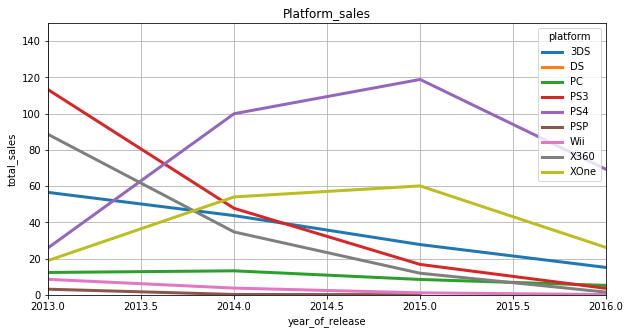

In [250]:
 #выведем на экран таблицу с платформами начиная с 2013 по 2016 г.
platform_sales = data.query('platform in @top_sales_platforms and year_of_release > 2012'
).pivot_table(index = 'year_of_release',  columns = 'platform', values = 'total_sales', aggfunc ='sum')
display(platform_sales)
platform_sales.plot(grid =True,figsize = (10,5), linewidth = 3)

plt.ylim(0,150)
plt.xlim(2013,2016)
plt.xlabel('year_of_release')
plt.ylabel('total_sales')
plt.title('Platform_sales')
plt.show()

На графике можно увидеть, что в основном срок жизни большинства платформ подошел к концу в 2016 году, из относительно новых можно выделить только XOne и PS4 и 3DS, но и по ним продажи идут на спад. Если рассматривать весь промежуток начиная с 2013 г, то лидером была PS4, далее следуют платформа PS3, XOne, X360 и 3DS. Компьютерные игры не приносили большой прибыли, однако за 2016 год прибыль по ним была больше чем, по  X360 и PS3.
Если мы строим прогноз на 2017 год я бы выделила три платформы как потенциально прибыльные за 2016 год PS4, PS3, XOne. 


**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат**

In [251]:
 # запишем в переменную срез данных, с которым мы дальше будем работать.
global_platform = data.query('platform in @top_sales_platforms and year_of_release > 2012')
display(global_platform)



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16682,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'copies_sold')

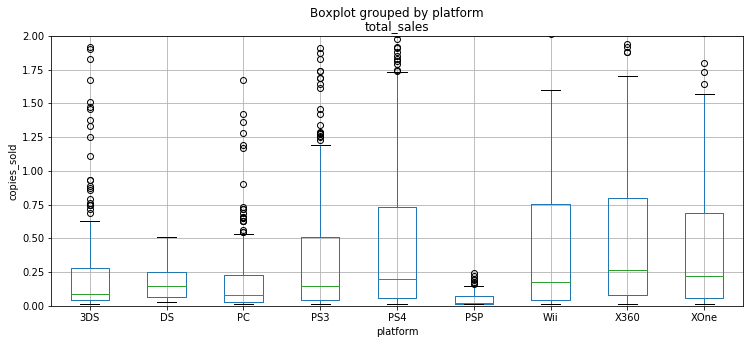

In [252]:
global_platform.boxplot(column = 'total_sales', by = 'platform',figsize = (12,5))
plt.ylim(0,2)
plt.xlabel('platform')
plt.ylabel('copies_sold')


на графике мы можем увидеть распределение продаж, самое большое количество игр продано для платформ PS4, X360 и XOne. Но X360 я бы не стала включать в список потенциально прибыльных, так как продаж в 2016 году по ней очень мало.

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы**

platform 3DS
Корреляция между total_sales and critic_score
0.35705661422881035


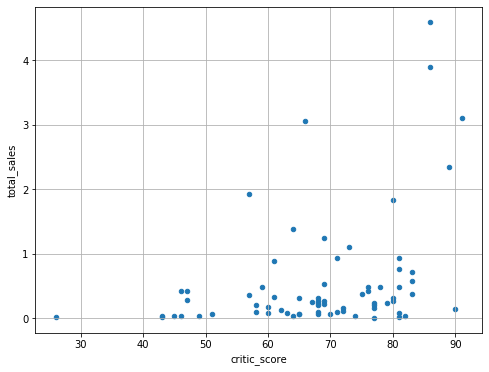

Корреляция между total_sales and user_score
0.24150411773563016


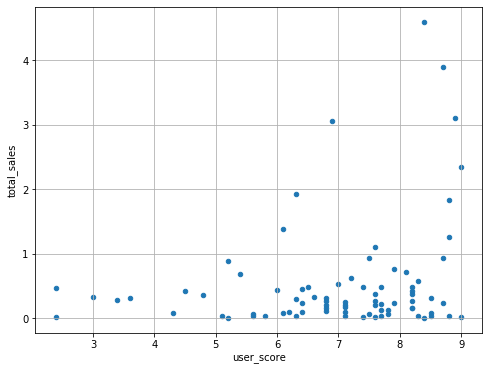

platform PS4
Корреляция между total_sales and critic_score
0.406567902061781


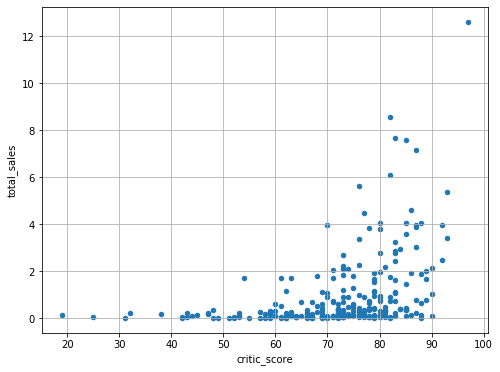

Корреляция между total_sales and user_score
-0.031957110204556376


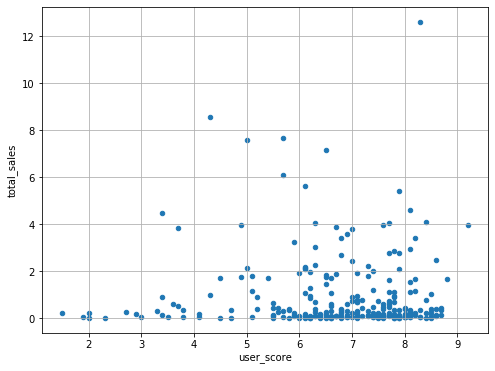

platform XOne
Корреляция между total_sales and critic_score
0.41699832800840175


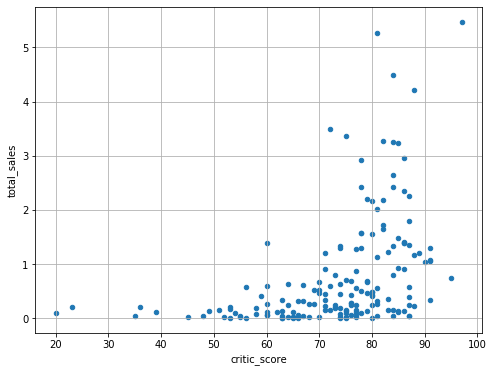

Корреляция между total_sales and user_score
-0.06892505328279412


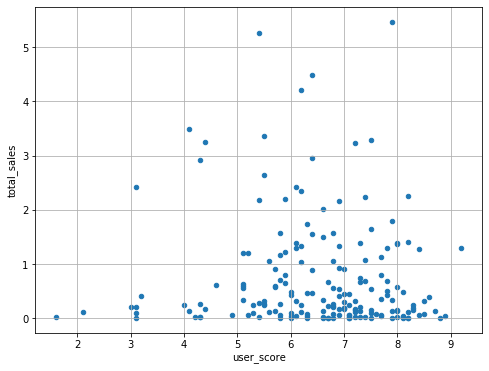

platform PC
Корреляция между total_sales and critic_score
0.19603028294369382


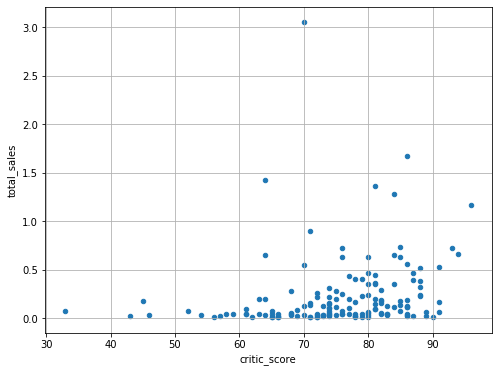

Корреляция между total_sales and user_score
-0.09384186952476739


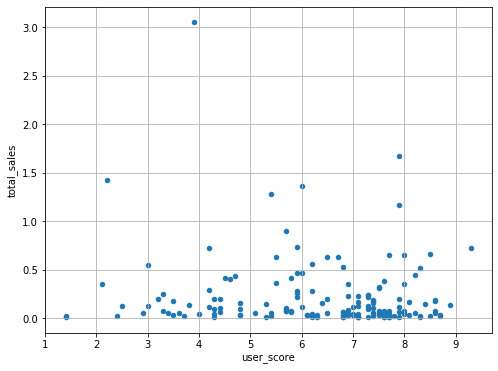

platform PS3
Корреляция между total_sales and critic_score
0.3342853393371919


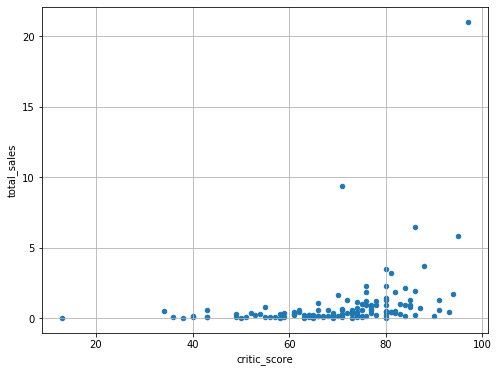

Корреляция между total_sales and user_score
0.0023944027357566925


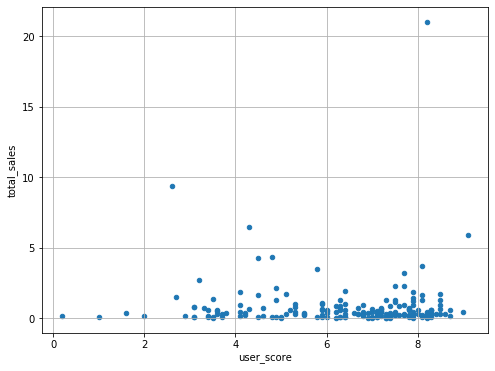

In [253]:
list_corr = ['critic_score', 'user_score'] # выделим пять популярных платформ на 2016 год и с помощью цикла сделаем расчет и построим диаграмму

for target_platform in ["3DS", "PS4", "XOne", "PC", "PS3"]:
    print("platform " + target_platform)
    platform_sales = global_platform.query('platform == @target_platform')
    for column in list_corr:
        print("Корреляция между " + "total_sales" + " and " + column)
        print(platform_sales['total_sales'].corr(platform_sales[column]))
        platform_sales.plot(x=column, y='total_sales', kind='scatter', figsize=(8, 6), sharex=False, grid=True) 
        plt.show()

Исходя из полученных данных можно сказать, что прямая взаимосвязь отсутствует между отзывами пользователей и продажами по всем пяти платформам, так как коэффициент Пирсона близок к нулю.
В случае с отзывами критиков и продажами можно говорить о некоторой связи, однако не слишком сильной, линейной эту взаимосвязь назвать точно нельзя.

**Соотнесите выводы с продажами игр на других платформах**

Если в топовых платформах мы не наблюдаем зависимости между продажами и отзвывами, то соответственно и на других платформах картина не поменяется.

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

In [254]:
display(global_platform)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16682,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.0,7.6,M,0.01


Посмотрим на общее распределение игр по жанрам с помощью метода value_counts()

In [255]:
global_platform['genre'].value_counts()

Action          593
Role-Playing    209
Sports          192
Shooter         177
Adventure       156
Misc            118
Racing           80
Fighting         66
Simulation       58
Platform         53
Strategy         47
Puzzle           11
Name: genre, dtype: int64

Итак, топ-3 жанра - это Action далее с большим отрывом идут Role-Playing и Sports. Теперь посмотрим какие жанры самые прибыльные.(хотя в данном случае нет как такового понятия денежная прибыль, мы говорим о млн.копий)

In [256]:
print(global_platform.groupby('genre')['total_sales'].sum().sort_values(ascending=False))

genre
Action          297.40
Shooter         226.06
Sports          146.11
Role-Playing    133.73
Misc             51.59
Racing           32.43
Fighting         28.03
Platform         25.89
Simulation       21.51
Adventure        20.02
Strategy          8.51
Puzzle            1.79
Name: total_sales, dtype: float64


Лидером остается Action, далее идут Shooter  и Sports, самые не востребованные это Strategy и Puzzle.

В шаге №3 мы провели достаточно большой исследовательский анализ, в результате чего определили актуальный период исходя из жизненного цикла платформ, посмотрели есть ли зависимость между отзывами пользователей и критиков и продажами внутри популярных платформ. А таже определили самые прибыльные жанры.

# Шаг 4. Составьте портрет пользователя каждого региона

**Определите для пользователя каждого региона (NA, EU, JP):**  
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.  
- Самые популярные жанры (топ-5). Поясните разницу.  
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Определим популярные платформы для Северной Америки. Ранее мы уже определили топ-5 актуальных платформ, посмотрим на распределение по ним.

platform
PS4     108.74
XOne     93.12
PS3      63.50
3DS      38.20
PC       11.11
Name: na_sales, dtype: float64

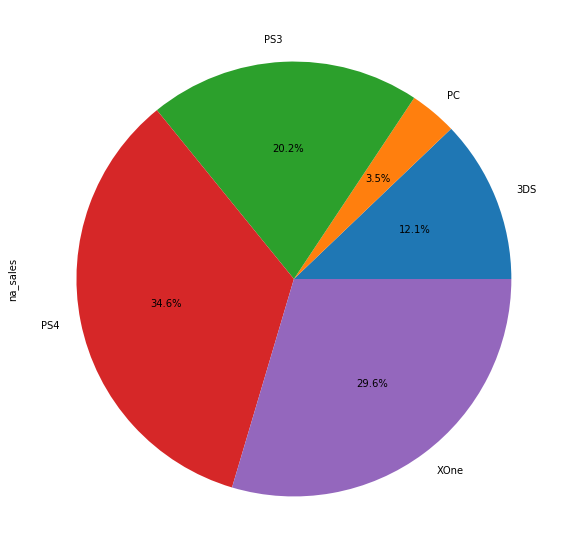

In [257]:
top_platforms = global_platform.query('platform in ["3DS", "PS4", "XOne", "PC", "PS3"]') #сделаем срез по самым топовым платформам и запишем в переменную
display(top_platforms.groupby('platform')['na_sales'].sum().sort_values(ascending=False))

top_platforms.groupby('platform')['na_sales'].sum().plot.pie(y = 'platform', figsize=(10, 10), autopct='%1.1f%%')


Как мы видим из графика лидером является PS4, далее с небольшим отрывом идет XOne.

Посмотрим на популярные платформы в Европе

platform
PS4     141.09
PS3      67.81
XOne     51.59
3DS      30.96
PC       25.36
Name: eu_sales, dtype: float64

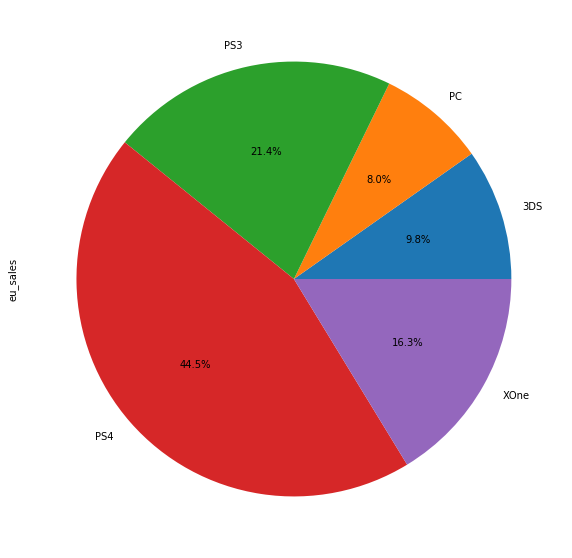

In [258]:
display(top_platforms.groupby('platform')['eu_sales'].sum().sort_values(ascending=False))

top_platforms.groupby('platform')['eu_sales'].sum().plot.pie(y = 'platform', figsize=(10, 10), autopct='%1.1f%%')

В Европе уже другое распределение - лидером является PS4, с большим отрывом на втром месте PS3 и за ней уже XOne.

platform
3DS     67.81
PS3     23.35
PS4     15.96
XOne     0.34
PC       0.00
Name: jp_sales, dtype: float64

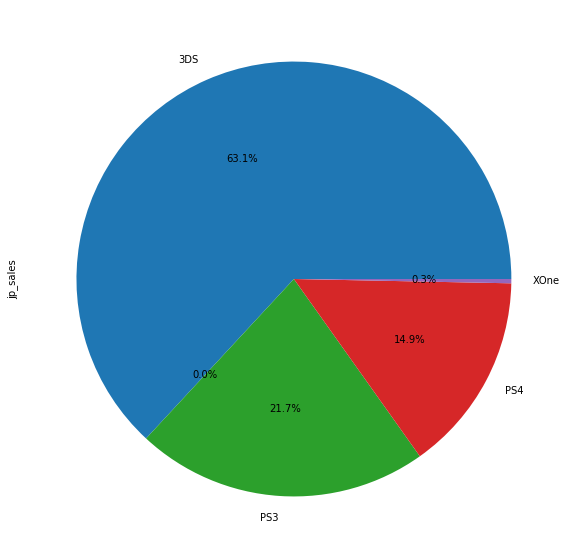

In [259]:
display(top_platforms.groupby('platform')['jp_sales'].sum().sort_values(ascending=False))

top_platforms.groupby('platform')['jp_sales'].sum().plot.pie(y = 'platform', figsize=(10, 10), autopct='%1.1f%%')

На первом месте конечно же 3DS, затем следует PS3 и с небольшим отрывом PS4, компьютерные игры в Японии вообще не востребованы.

Определим самые популярные жанры топ-5. Группировать будем по жанру и по количеству проданных копий.

In [260]:
# для Америки
top_platforms.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)


genre
Action          88.71
Shooter         85.03
Sports          48.12
Role-Playing    41.38
Misc            12.76
Name: na_sales, dtype: float64

In [261]:
# для Европы
top_platforms.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)


genre
Action          93.57
Shooter         75.79
Sports          50.14
Role-Playing    34.22
Racing          16.37
Name: eu_sales, dtype: float64

In [262]:
# для Японии
top_platforms.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)


genre
Role-Playing    42.47
Action          32.64
Fighting         5.97
Misc             4.93
Shooter          4.79
Name: jp_sales, dtype: float64

Вкусовые предпочтения в играх у американцев и европейцев отличаются от японских, наверное из-за разницы в менталите, другого объяснения нет. Японцы больше предпочитают ролевые игры, также в их топ-5 жанров входит Fighting, чего нет в топ -5 Американцев и Европейцев.

Посмотрим на влияние рейтинга ESRB на продажи.  Для этого построим boxplot у которого по х будут рейтинги, а по y - продажи, по такому графику можно будет оценить медианные продажи для каждого рейтинга.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 2)

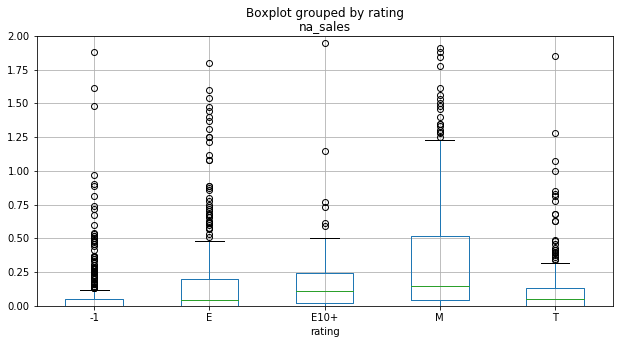

In [263]:
top_platforms.fillna(-1).boxplot(column = 'na_sales', by = 'rating',figsize = (10,5))
plt.ylim(0,2)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 1)

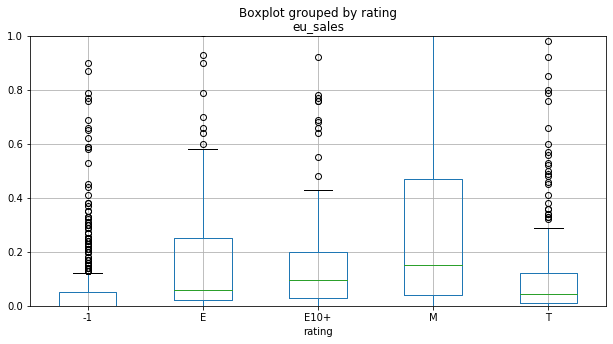

In [264]:
top_platforms.fillna(-1).boxplot(column = 'eu_sales', by = 'rating',figsize = (10,5))
plt.ylim(0,1)

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(-0.5, 0.5)

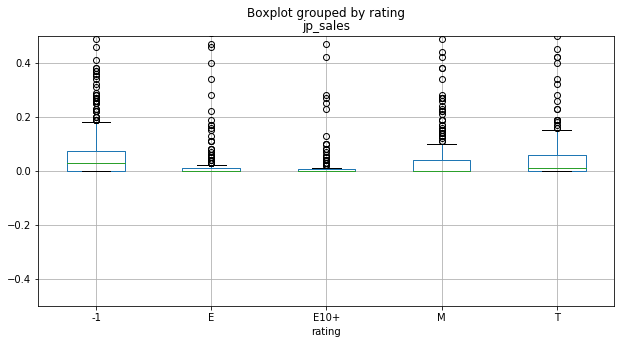

In [265]:
top_platforms.fillna(-1).boxplot(column = 'jp_sales', by = 'rating',figsize = (10,5))
plt.ylim(-0.5,0.5)

Сделаем выводы: Заполним пропуски в рейтинге на вымышленную категорию -1, чтобы можно было увидеть распределение на графике. В данной категории очень много выбросов во всех трех регионах, в Японии это лидирующая категория (игр без рейтингов), скорее всего это игры которые выпускаются только для Японского рынка. В Америке и Европе помимо востребованных игр без рейтинга  ESRB, также популярны игры в категории "для взрослы" и для "подростков".

# Шаг 5. Проверьте гипотезы


- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;   
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Перед тем как проверять гипотезы надо почистить данные от пропусков.

In [267]:
top_platforms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1476 entries, 16 to 16710
Data columns (total 12 columns):
name               1476 non-null object
platform           1476 non-null object
year_of_release    1476 non-null int64
genre              1476 non-null object
na_sales           1476 non-null float64
eu_sales           1476 non-null float64
jp_sales           1476 non-null float64
other_sales        1476 non-null float64
critic_score       762 non-null float64
user_score         860 non-null float64
rating             885 non-null object
total_sales        1476 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 149.9+ KB


In [268]:

top_platforms.dropna(subset = ['user_score'], inplace=True)
top_platforms['user_score'].isna().sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0

Проверяем первую исследовательскую гипотезу: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Она трансформируется в две статистические гипотезы: 
- Н0: Средние пользовательские рейтинги платформ Xbox One и PC равны  
- Н1: Средние пользовательские рейтинги платформ Xbox One и PC не равны  
Проведем t-тест, используя метод scipy.stats.ttest_ind (array1, array2,equal_var)  

In [269]:
Xbox_One = top_platforms[top_platforms['platform'] == "XOne"]['user_score'] 
PC = top_platforms[top_platforms['platform'] == "PC"]['user_score']


In [270]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    Xbox_One, 
    PC, equal_var=False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Нулевую гипотезу не отвергаем, рейтинги платформ Xbox One и PC равны .

Проверяем вторую исследовательскую гипотезу: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Она трансформируется в две статистические гипотезы:  
- Н0: Средние пользовательские рейтинги жанров Action и Sports равны
- Н1: Средние пользовательские рейтинги жанров Action и Sports не равны  
Проведем t-тест, используя метод scipy.stats.ttest_ind (array1, array2,equal_var)


In [271]:
Action = top_platforms[top_platforms['genre'] == "Action"]['user_score']
Sports = top_platforms[top_platforms['genre'] == "Sports"]['user_score']

In [272]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    Action, 
    Sports, equal_var=False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  9.700694840646563e-14
Отвергаем нулевую гипотезу


Средние пользовательские рейтинги жанров  разные.

# Шаг 6. Напишите общий вывод

В заключении хотелось бы сказать, что была проведена большая работа в области анализа данных на основе информации из открытых источников  о продажах игр, оценки пользователей и экспертов, жанров и платформ (например, Xbox или PlayStation). Целью которой было -  выявить определяющие успешность игры закономерности.  
На этапе проведения исследовательского анализа мы выделили актуальный период (2013-2016 год включительно), по которому в дальнейшем провели весь анализ и проверили гипотезы. В результате анализа мы определили популярные платформы, по которым можно строить прогноз на 2017 г. это "3DS", "PS4", "XOne", "PC", "PS3" они еще активны и по ним есть неплохие продажи, особенно среди них выделяется  "PS4".    
Далее мы составили портрет пользователя для каждого из регионов NA, EU, JP, в результате чего определили, что пользователи из Японии сильно отличаются в предпочтениях в отличие от Американцев и Европейцев, как в выборе платформы , так и в выборе игрового жанра. Также на основе рейтинга ESRB мы определили наиболее востребованной категорией являются игры «Для взрослых».  
В конце мы проверили две гипотезы и выявили, что средние пользовательские рейтинги платформ  Xbox One и PC равны, а вот средние пользовательские рейтинги жанров Action и Sports отличаются.  